# Quiz 4

<font size='4'>

BIOS-584<br>
Nov 21, 2025

* Write down your name in a Markdown section.

Sapna David

In [1]:
import numpy as np
import pandas as pd
import os

## Preliminary

<font size='4'>
    
* There are six files stored under `Your own GitHub repository/data/Quiz4`.
* Import those six files using relevant functions in `Pandas`.

In [10]:
base_path = "/Users/sapnadavid/Documents/GitHub/BIOS-584/BIOS-584/data/Quiz4/"

data1 = pd.read_csv(base_path + "data_1.txt", sep=",")
data2 = pd.read_csv(base_path + "data_2.txt", sep=",")
data3 = pd.read_csv(base_path + "data_3.txt", sep=",")
data4 = pd.read_csv(base_path + "data_4.txt", sep=",")
data5 = pd.read_csv(base_path + "data_5.txt", sep=",")
data6 = pd.read_csv(base_path + "data_6.txt", sep=",")

## Import Data

<font size='4'>

* Three lists named `study_id_ls`, `measure_date_ls`, and `duration_ls` have been initialized.
* Write a for loop to extract and append the values of `study_id`, `measure_date`, and `duration` to `study_id_ls`, `measure_date_ls`, and `duration_ls`, respectively.

In [12]:
study_id = []
measure_date = []
duration = []

datasets = [data1, data2, data3, data4, data5, data6]

for df in datasets:
    for i in range(len(df)):
        study_id.append(df["study_id"][i])
        measure_date.append(df["measure_date"][i])
        duration.append(df["duration"][i])

<font size='4'>

* Create a new Pandas Dataframe combining three lists and name it `input_df`.

In [16]:
input_df = pd.DataFrame({
    "study_id": study_id,
    "measure_date": measure_date,
    "duration": duration
})

<font size='4'>

* Show or print `input_df`

In [18]:
print(input_df)

   study_id measure_date  duration
0         1   2025-01-01       100
1         1   2025-03-01       300
2         1   2025-02-01       200
3         1   2025-11-01        25
4         1   2025-11-01        20
5         1   2025-11-03        30


## Data Manipulation

<font size='4'>

* Reorder the dataframe by `measure_date` (earliest to latest) and then by `duration` (shortest to longest).

In [38]:
input_df_sorted["measure_date"] = pd.to_datetime(input_df_sorted["measure_date"], errors='coerce')
print(input_df_sorted["measure_date"])

0   2025-01-01
1   2025-02-01
2   2025-03-01
3   2025-11-01
4   2025-11-01
5   2025-11-03
Name: measure_date, dtype: datetime64[ns]


<font size='4'>

* Create a new column called `relative_time` by calculating the time difference in days between each of the measure date and the earliest one.

In [41]:
earliest_date = input_df_sorted["measure_date"].min()
input_df_sorted["relative_time"] = (input_df_sorted["measure_date"] - earliest_date).dt.days


<font size='4'>

* Reset the index column and remove the old index.

In [36]:
input_df_sorted = input_df_sorted.reset_index(drop=True)


## Final Data Visualization
<font size='4'>
    
* Display the final `input_df`.

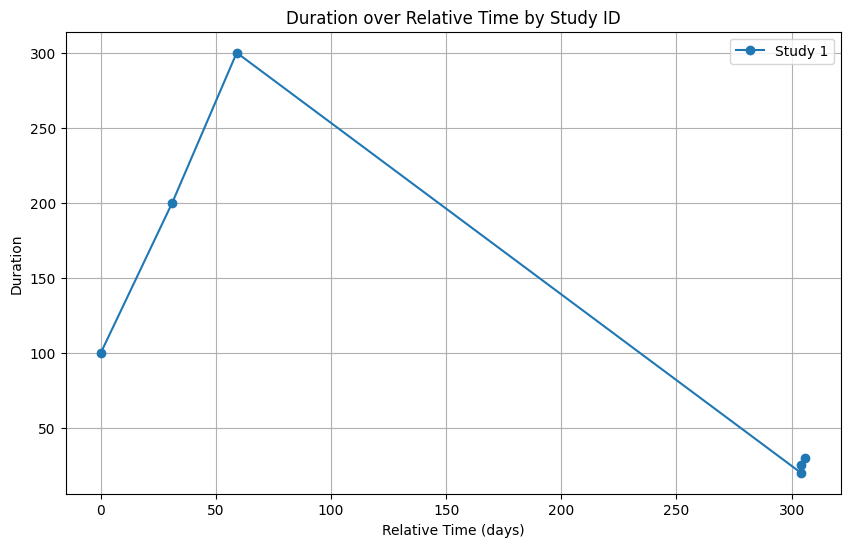

In [40]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))

# If you have multiple study_ids, plot each one separately
study_ids = input_df_sorted["study_id"].unique()

for sid in study_ids:
    df_sub = input_df_sorted[input_df_sorted["study_id"] == sid]
    plt.plot(df_sub["relative_time"], df_sub["duration"], marker='o', label=f"Study {sid}")

plt.title("Duration over Relative Time by Study ID")
plt.xlabel("Relative Time (days)")
plt.ylabel("Duration")
plt.legend()
plt.grid(True)
plt.show()